Imports statements (getting FashionMNIST dataset)

In [10]:
from keras.datasets import fashion_mnist
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


This is where I load the datasets

In [11]:
def charge_set():
   (trainA, trainB), (testA, testB) = fashion_mnist.load_data()
   trainA = trainA.reshape((trainA.shape[0], 28, 28, 1))
   testnA = testA.reshape((testA.shape[0], 28, 28, 1))

   trainB = to_categorical(trainB)
   testB = to_categorical(testB)

   return trainA, trainB, testA, testB



Scaling the pixels

In [12]:

def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')

	train_norm = train_norm / 265.0
	test_norm = test_norm / 265.0

	return train_norm, test_norm


  

Intializing the model

In [13]:
def define_model():
	In_model = Sequential()
	In_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	In_model.add(MaxPooling2D((2, 2)))
	In_model.add(Flatten())
	In_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	In_model.add(Dense(10, activation='softmax'))

	opt = SGD(lr=0.01, momentum=0.9)
	In_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return In_model


  

Evaluating the model

In [14]:
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		trainA, trainB, testA, testB = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(trainA, trainB, epochs=30, batch_size=30, validation_data=(testA, testB), verbose=0)
		_, acc = model.evaluate(testA, testB, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories



plotting the learning curves

In [15]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()
 


will give the summary of the perfromance that occur

In [16]:
def summarize_performance(scores):
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	pyplot.boxplot(scores)
	pyplot.show()

testing the evaluated model

In [17]:
def run_test():
	trainA, trainB, testA, testB = charge_set()
	trainA, testA = prep_pixels(trainA, testA)
	scores, histories = evaluate_model(trainA, trainB)
	summarize_diagnostics(histories)
	summarize_performance(scores)
 

Running the test

> 91.275
> 91.292
> 90.417
> 90.983
> 91.533


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


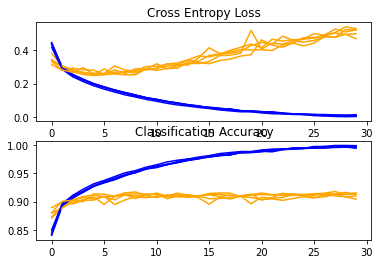

Accuracy: mean=91.100 std=0.384, n=5


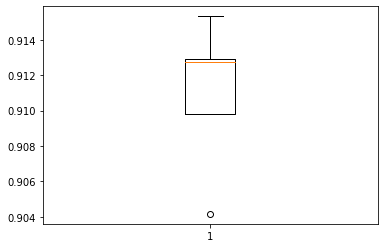

In [18]:
run_test()

In [19]:
def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img

In [20]:
result = model.predict_classes(img)

NameError: ignored

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img

def run_example():
	img = load_image('sample_image.png')
	model = load_model('final_model.h5')
	result = model.predict_classes(img)
	print(result[0])

run_example()